# MiNet: A Convolutional Neural Network for the Detection of Minerals

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

## Data

In [3]:
path = Path('data/minet')

In [4]:
tfms = get_transforms(flip_vert=True)

In [5]:
np.random.seed(249)
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=tfms, size=224).normalize(imagenet_stats)

**let's take a look at some of the images**

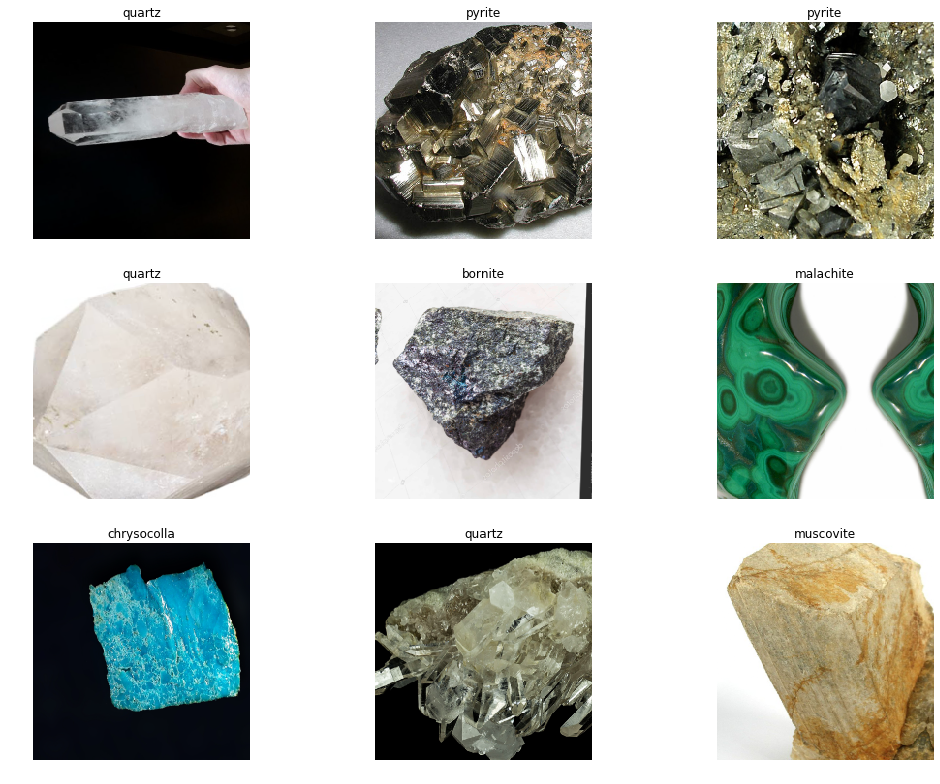

In [6]:
data.show_batch(3, figsize=(15, 11))

In [7]:
data.classes

['biotite',
 'bornite',
 'chrysocolla',
 'malachite',
 'muscovite',
 'pyrite',
 'quartz']

## Model

In [8]:
learn = create_cnn(data, models.resnet18, metrics=error_rate)

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


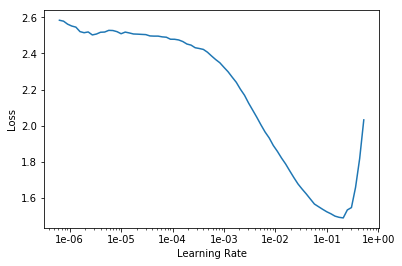

In [10]:
learn.recorder.plot()

In [11]:
lr = 1e-2
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,error_rate
1,1.943320,1.106747,0.357895
2,1.269378,0.570617,0.210526
3,0.963384,0.519261,0.215789
4,0.772541,0.472366,0.157895
5,0.647658,0.475709,0.178947
6,0.551177,0.463819,0.163158
7,0.479950,0.471258,0.157895
8,0.422144,0.490845,0.168421
9,0.368936,0.493225,0.173684
10,0.332349,0.491060,0.168421


In [12]:
learn.save('stage-1-r18')

### Unfreeze and finetune

In [18]:
learn.load('stage-1');

In [13]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


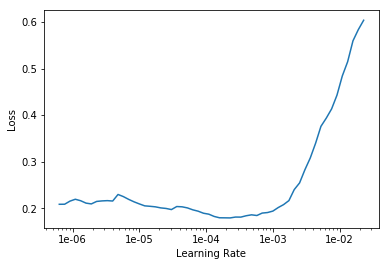

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(10, slice(1e-4, lr/5))

epoch,train_loss,valid_loss,error_rate
1,0.179330,0.427246,0.131579
2,0.164587,0.521188,0.163158
3,0.177445,0.950226,0.200000
4,0.203961,1.078267,0.215789
5,0.203271,0.724102,0.152632
6,0.201568,0.348171,0.089474
7,0.181279,0.377665,0.105263
8,0.157127,0.386797,0.115789
9,0.139364,0.375032,0.115789
10,0.123563,0.370047,0.110526


## Model Interpretation

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

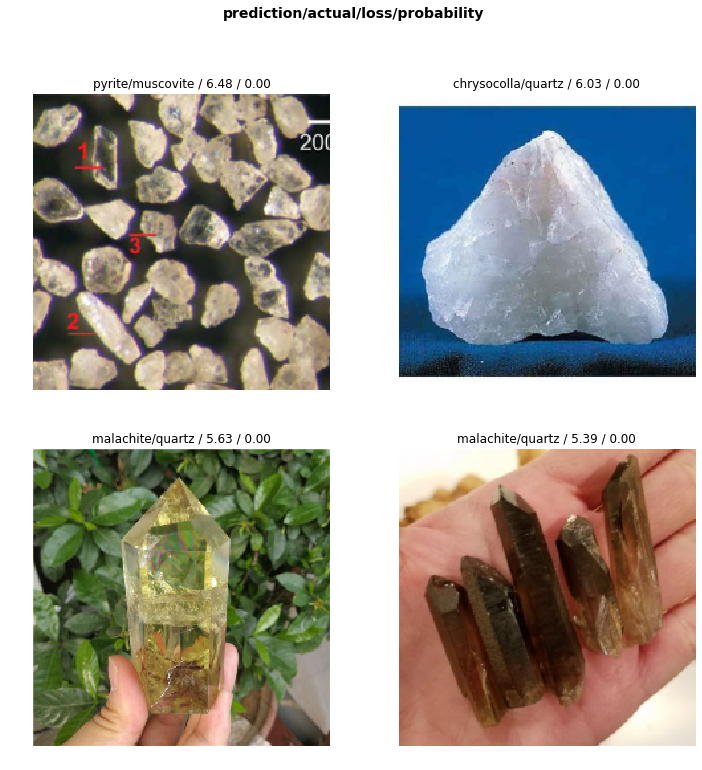

In [24]:
interp.plot_top_losses(4)

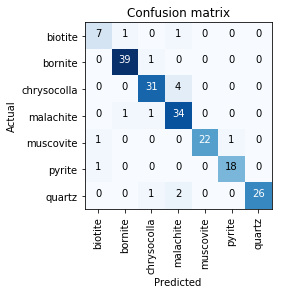

In [26]:
interp.plot_confusion_matrix()